In [ ]:
# This notebook was used to all of our visualizations and everything other than the accuracy and fairness metrics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Note: this is a particular solution to import files from Google Drive
# if you are performing this examination via some other method you may have to
# directly import the documents themselves, just an FYI.

Mounted at /content/drive


In [ ]:
PATH = "/content/drive/MyDrive/Kaggle_Home_Credit-master/data/raw"

application_train = pd.read_csv(PATH+"/application_train.csv")
application_test = pd.read_csv(PATH+"/application_test.csv")

bureau = pd.read_csv(PATH+"/bureau.csv")
bureau_balance = pd.read_csv(PATH+"/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"/credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"/installments_payments.csv")
previous_application = pd.read_csv(PATH+"/previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"/POS_CASH_balance.csv")

In [ ]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])
print("bureau -  rows:", bureau.shape[0], " columns:", bureau.shape[1])
print("bureau_balance -  rows:", bureau_balance.shape[0], " columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows:", credit_card_balance.shape[0], " columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:", installments_payments.shape[0], " columns:", installments_payments.shape[1])
print("previous_application -  rows:", previous_application.shape[0], " columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows:", POS_CASH_balance.shape[0], " columns:", POS_CASH_balance.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8


In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
application_train.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
application_train.CODE_GENDER.count()

307511

The application_train df has an extra column that also determines the "target", aka whether or not a client is going to default. A 0 indicates the client will not default (as in they'll pay their loan on time) whereas a 1 indicates the client will default (they failed to pay their loan).

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
for column_name, dtype in application_train.dtypes.items():
    print(column_name,"-->",dtype)

SK_ID_CURR --> int64
TARGET --> int64
NAME_CONTRACT_TYPE --> object
CODE_GENDER --> object
FLAG_OWN_CAR --> object
FLAG_OWN_REALTY --> object
CNT_CHILDREN --> int64
AMT_INCOME_TOTAL --> float64
AMT_CREDIT --> float64
AMT_ANNUITY --> float64
AMT_GOODS_PRICE --> float64
NAME_TYPE_SUITE --> object
NAME_INCOME_TYPE --> object
NAME_EDUCATION_TYPE --> object
NAME_FAMILY_STATUS --> object
NAME_HOUSING_TYPE --> object
REGION_POPULATION_RELATIVE --> float64
DAYS_BIRTH --> int64
DAYS_EMPLOYED --> int64
DAYS_REGISTRATION --> float64
DAYS_ID_PUBLISH --> int64
OWN_CAR_AGE --> float64
FLAG_MOBIL --> int64
FLAG_EMP_PHONE --> int64
FLAG_WORK_PHONE --> int64
FLAG_CONT_MOBILE --> int64
FLAG_PHONE --> int64
FLAG_EMAIL --> int64
OCCUPATION_TYPE --> object
CNT_FAM_MEMBERS --> float64
REGION_RATING_CLIENT --> int64
REGION_RATING_CLIENT_W_CITY --> int64
WEEKDAY_APPR_PROCESS_START --> object
HOUR_APPR_PROCESS_START --> int64
REG_REGION_NOT_LIVE_REGION --> int64
REG_REGION_NOT_WORK_REGION --> int64
LIVE_REGION

In [ ]:
missing_data(application_train)[:10]

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [ ]:
for column_name, dtype in bureau.dtypes.items():
    print(column_name,"-->",dtype)

SK_ID_CURR --> int64
SK_ID_BUREAU --> int64
CREDIT_ACTIVE --> object
CREDIT_CURRENCY --> object
DAYS_CREDIT --> int64
CREDIT_DAY_OVERDUE --> int64
DAYS_CREDIT_ENDDATE --> float64
DAYS_ENDDATE_FACT --> float64
AMT_CREDIT_MAX_OVERDUE --> float64
CNT_CREDIT_PROLONG --> int64
AMT_CREDIT_SUM --> float64
AMT_CREDIT_SUM_DEBT --> float64
AMT_CREDIT_SUM_LIMIT --> float64
AMT_CREDIT_SUM_OVERDUE --> float64
CREDIT_TYPE --> object
DAYS_CREDIT_UPDATE --> int64
AMT_ANNUITY --> float64


In [ ]:
missing_data(bureau)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


In [ ]:
for column_name, dtype in bureau_balance.dtypes.items():
    print(column_name,"-->",dtype)

SK_ID_BUREAU --> int64
MONTHS_BALANCE --> int64
STATUS --> object


In [ ]:
missing_data(bureau_balance)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [ ]:
for column_name, dtype in credit_card_balance.dtypes.items():
    print(column_name,"-->",dtype)

SK_ID_PREV --> int64
SK_ID_CURR --> int64
MONTHS_BALANCE --> int64
AMT_BALANCE --> float64
AMT_CREDIT_LIMIT_ACTUAL --> int64
AMT_DRAWINGS_ATM_CURRENT --> float64
AMT_DRAWINGS_CURRENT --> float64
AMT_DRAWINGS_OTHER_CURRENT --> float64
AMT_DRAWINGS_POS_CURRENT --> float64
AMT_INST_MIN_REGULARITY --> float64
AMT_PAYMENT_CURRENT --> float64
AMT_PAYMENT_TOTAL_CURRENT --> float64
AMT_RECEIVABLE_PRINCIPAL --> float64
AMT_RECIVABLE --> float64
AMT_TOTAL_RECEIVABLE --> float64
CNT_DRAWINGS_ATM_CURRENT --> float64
CNT_DRAWINGS_CURRENT --> int64
CNT_DRAWINGS_OTHER_CURRENT --> float64
CNT_DRAWINGS_POS_CURRENT --> float64
CNT_INSTALMENT_MATURE_CUM --> float64
NAME_CONTRACT_STATUS --> object
SK_DPD --> int64
SK_DPD_DEF --> int64


In [ ]:
missing_data(credit_card_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


In [ ]:
for column_name, dtype in installments_payments.dtypes.items():
    print(column_name,"-->",dtype)

SK_ID_PREV --> int64
SK_ID_CURR --> int64
NUM_INSTALMENT_VERSION --> float64
NUM_INSTALMENT_NUMBER --> int64
DAYS_INSTALMENT --> float64
DAYS_ENTRY_PAYMENT --> float64
AMT_INSTALMENT --> float64
AMT_PAYMENT --> float64


In [ ]:
missing_data(installments_payments)

,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


In [ ]:
for column_name, dtype in previous_application.dtypes.items():
    print(column_name,"-->",dtype)

SK_ID_PREV --> int64
SK_ID_CURR --> int64
NAME_CONTRACT_TYPE --> object
AMT_ANNUITY --> float64
AMT_APPLICATION --> float64
AMT_CREDIT --> float64
AMT_DOWN_PAYMENT --> float64
AMT_GOODS_PRICE --> float64
WEEKDAY_APPR_PROCESS_START --> object
HOUR_APPR_PROCESS_START --> int64
FLAG_LAST_APPL_PER_CONTRACT --> object
NFLAG_LAST_APPL_IN_DAY --> int64
RATE_DOWN_PAYMENT --> float64
RATE_INTEREST_PRIMARY --> float64
RATE_INTEREST_PRIVILEGED --> float64
NAME_CASH_LOAN_PURPOSE --> object
NAME_CONTRACT_STATUS --> object
DAYS_DECISION --> int64
NAME_PAYMENT_TYPE --> object
CODE_REJECT_REASON --> object
NAME_TYPE_SUITE --> object
NAME_CLIENT_TYPE --> object
NAME_GOODS_CATEGORY --> object
NAME_PORTFOLIO --> object
NAME_PRODUCT_TYPE --> object
CHANNEL_TYPE --> object
SELLERPLACE_AREA --> int64
NAME_SELLER_INDUSTRY --> object
CNT_PAYMENT --> float64
NAME_YIELD_GROUP --> object
PRODUCT_COMBINATION --> object
DAYS_FIRST_DRAWING --> float64
DAYS_FIRST_DUE --> float64
DAYS_LAST_DUE_1ST_VERSION --> float64

In [ ]:
missing_data(previous_application)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [ ]:
POS_CASH_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [ ]:
missing_data(POS_CASH_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [ ]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

In [ ]:
#the following are plots relevant to section 2:

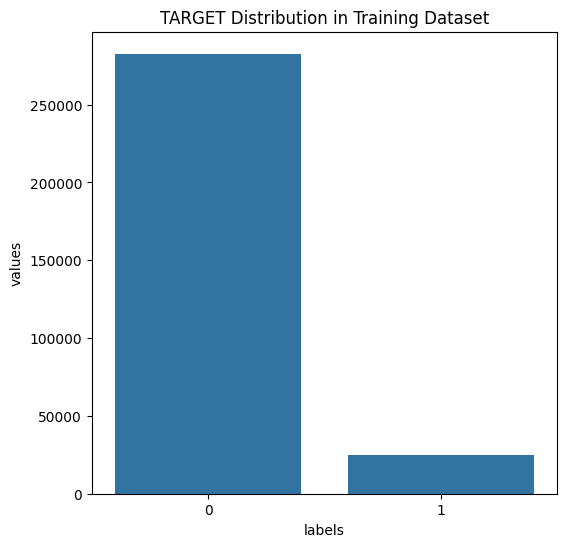

In [ ]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('TARGET Distribution in Training Dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

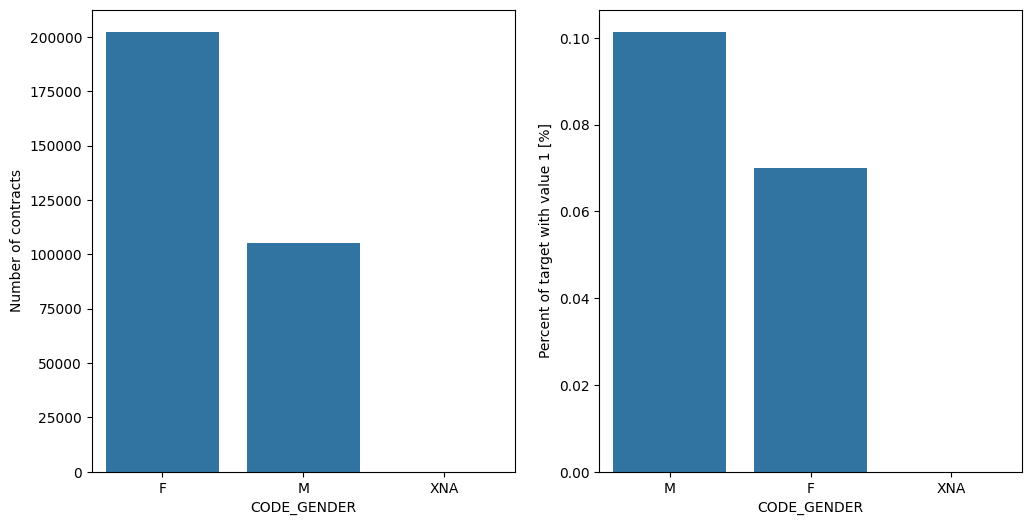

In [ ]:
plot_stats('CODE_GENDER')

In [ ]:
xna_count = application_train['CODE_GENDER'].value_counts().get('XNA', 0)
xna_count

4

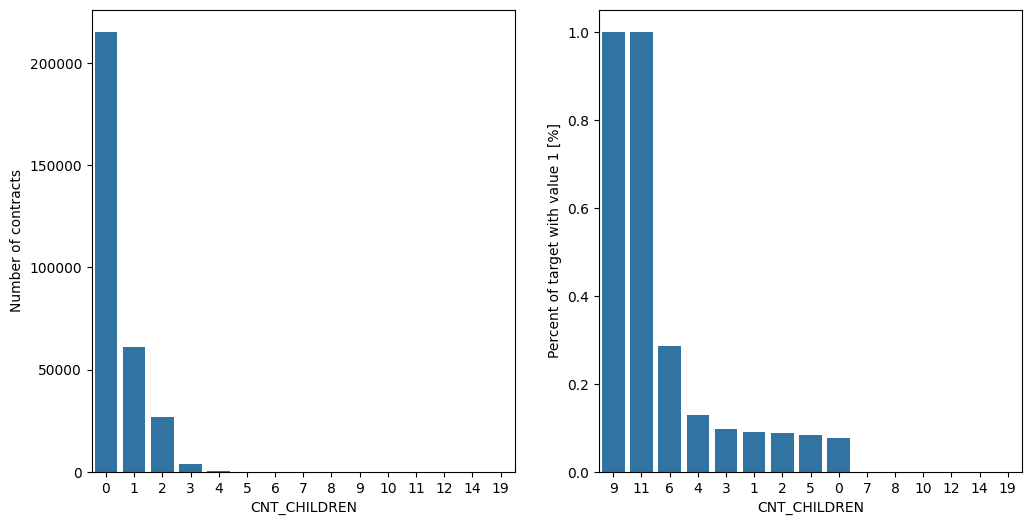

In [ ]:
plot_stats('CNT_CHILDREN')

<ipython-input-29-ed196db6688a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


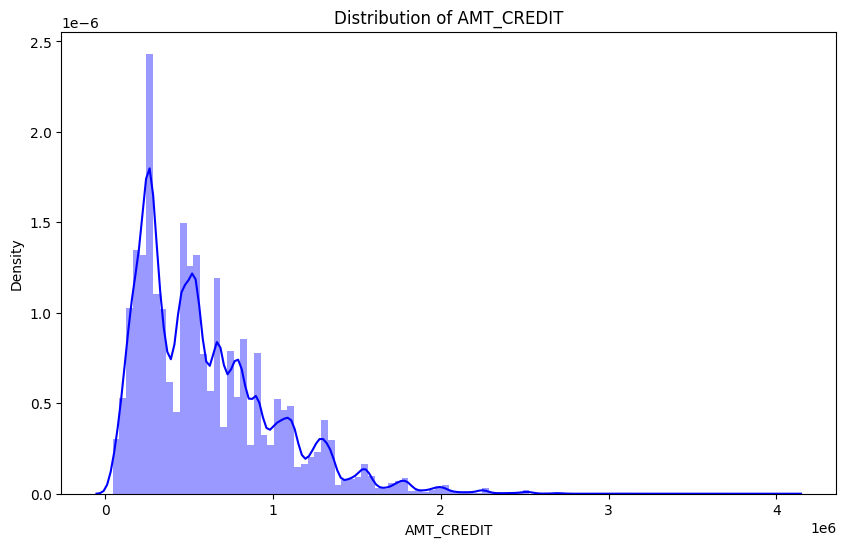

In [ ]:
plot_distribution('AMT_CREDIT','blue')

<ipython-input-23-eec0e6d862af>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
<ipython-input-23-eec0e6d862af>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


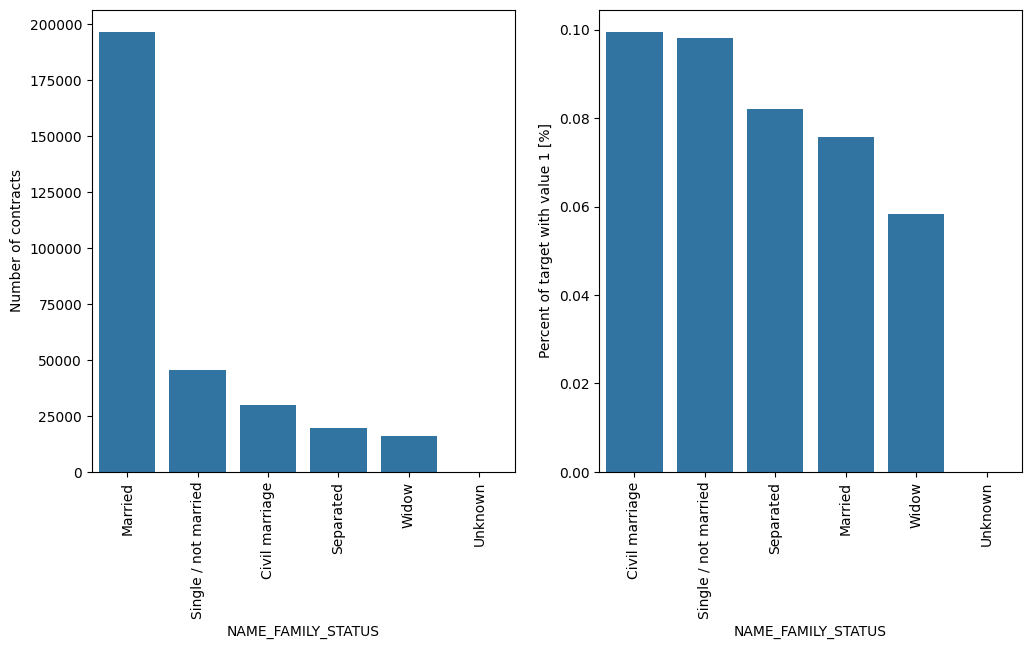

In [ ]:
plot_stats('NAME_FAMILY_STATUS',True, True)


In [ ]:
max(application_train['AMT_INCOME_TOTAL'])

117000000.0

In [ ]:
min(application_train['AMT_INCOME_TOTAL'])

25650.0

<ipython-input-29-ed196db6688a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


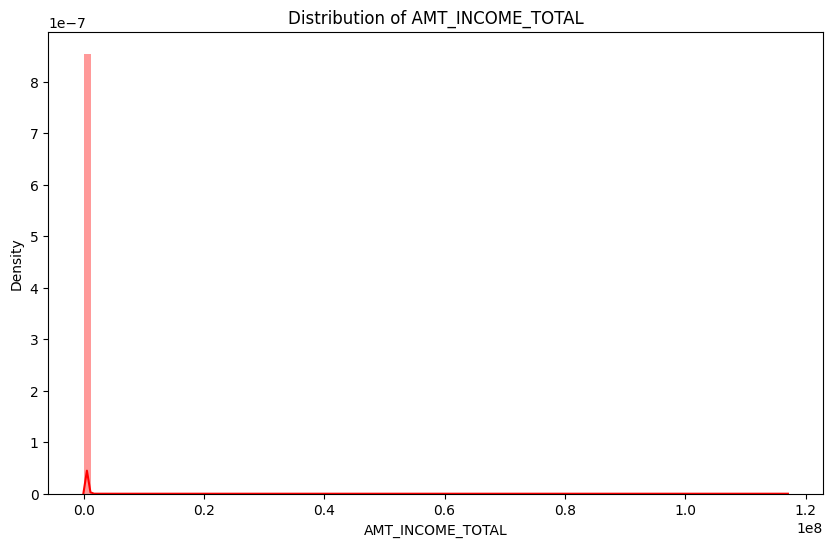

In [ ]:
plot_distribution('AMT_INCOME_TOTAL','red')

<ipython-input-47-09ef621742d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcdf1['CODE_GENDER'] = pcdf1['CODE_GENDER'].map({'M': 1, 'F': 0})
<ipython-input-47-09ef621742d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcdf1['NAME_FAMILY_STATUS'] = pcdf1['NAME_FAMILY_STATUS'].map(lambda x: 0 if x == 'Single / not married' else 1)


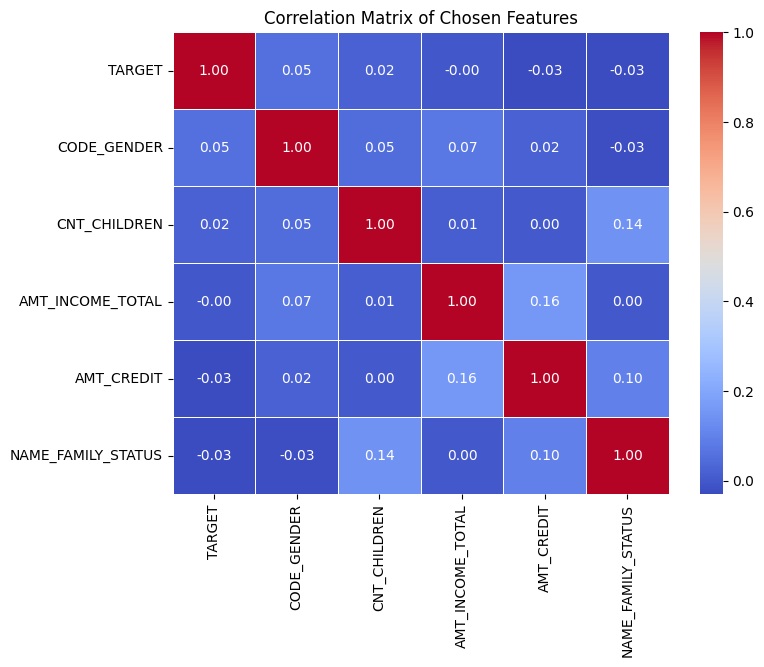

In [ ]:
# The few features we thought were interesting and might be related
selected_columns = ['TARGET', 'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_FAMILY_STATUS']
pcdf1 = application_train[selected_columns]
pcdf1['CODE_GENDER'] = pcdf1['CODE_GENDER'].map({'M': 1, 'F': 0})
pcdf1['NAME_FAMILY_STATUS'] = pcdf1['NAME_FAMILY_STATUS'].map(lambda x: 0 if x == 'Single / not married' else 1)

correlation_matrix = pcdf1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Chosen Features')
plt.show()

<ipython-input-48-acad9cac8eb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcdf2['CODE_GENDER'] = pcdf2['CODE_GENDER'].map({'M': 1, 'F': 0})
<ipython-input-48-acad9cac8eb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcdf2['NAME_FAMILY_STATUS'] = pcdf2['NAME_FAMILY_STATUS'].map(lambda x: 0 if x == 'Single / not married' else 1)


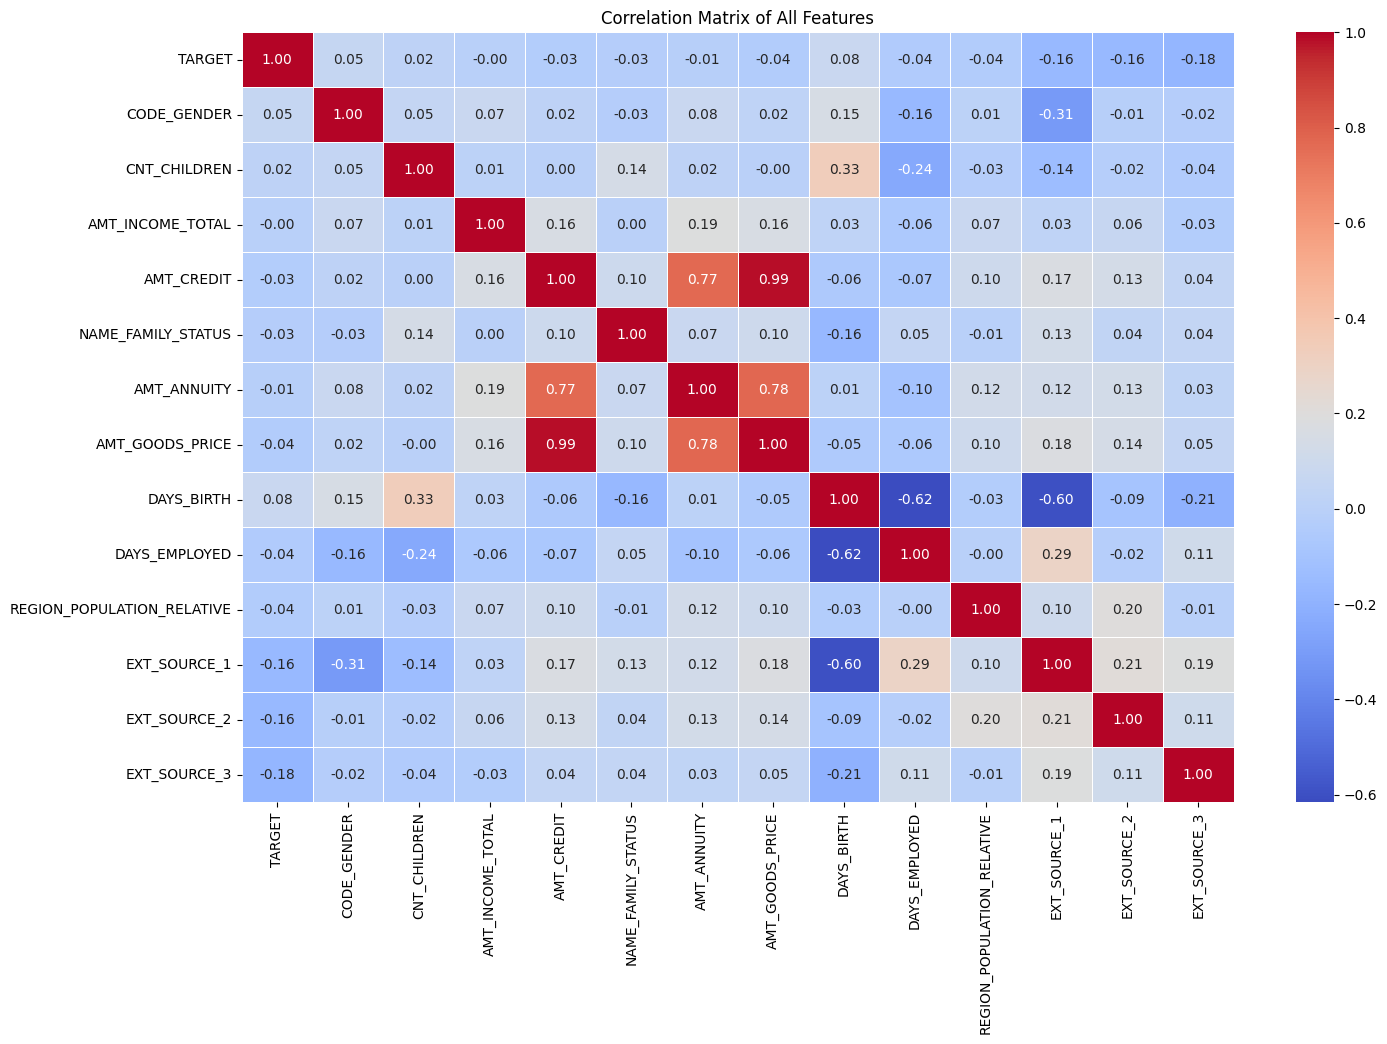

In [ ]:
# All numerical features + gender and family status
selected_columns = ['TARGET', 'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_FAMILY_STATUS', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
pcdf2 = application_train[selected_columns]
pcdf2['CODE_GENDER'] = pcdf2['CODE_GENDER'].map({'M': 1, 'F': 0})
pcdf2['NAME_FAMILY_STATUS'] = pcdf2['NAME_FAMILY_STATUS'].map(lambda x: 0 if x == 'Single / not married' else 1)

correlation_matrix = pcdf2.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()

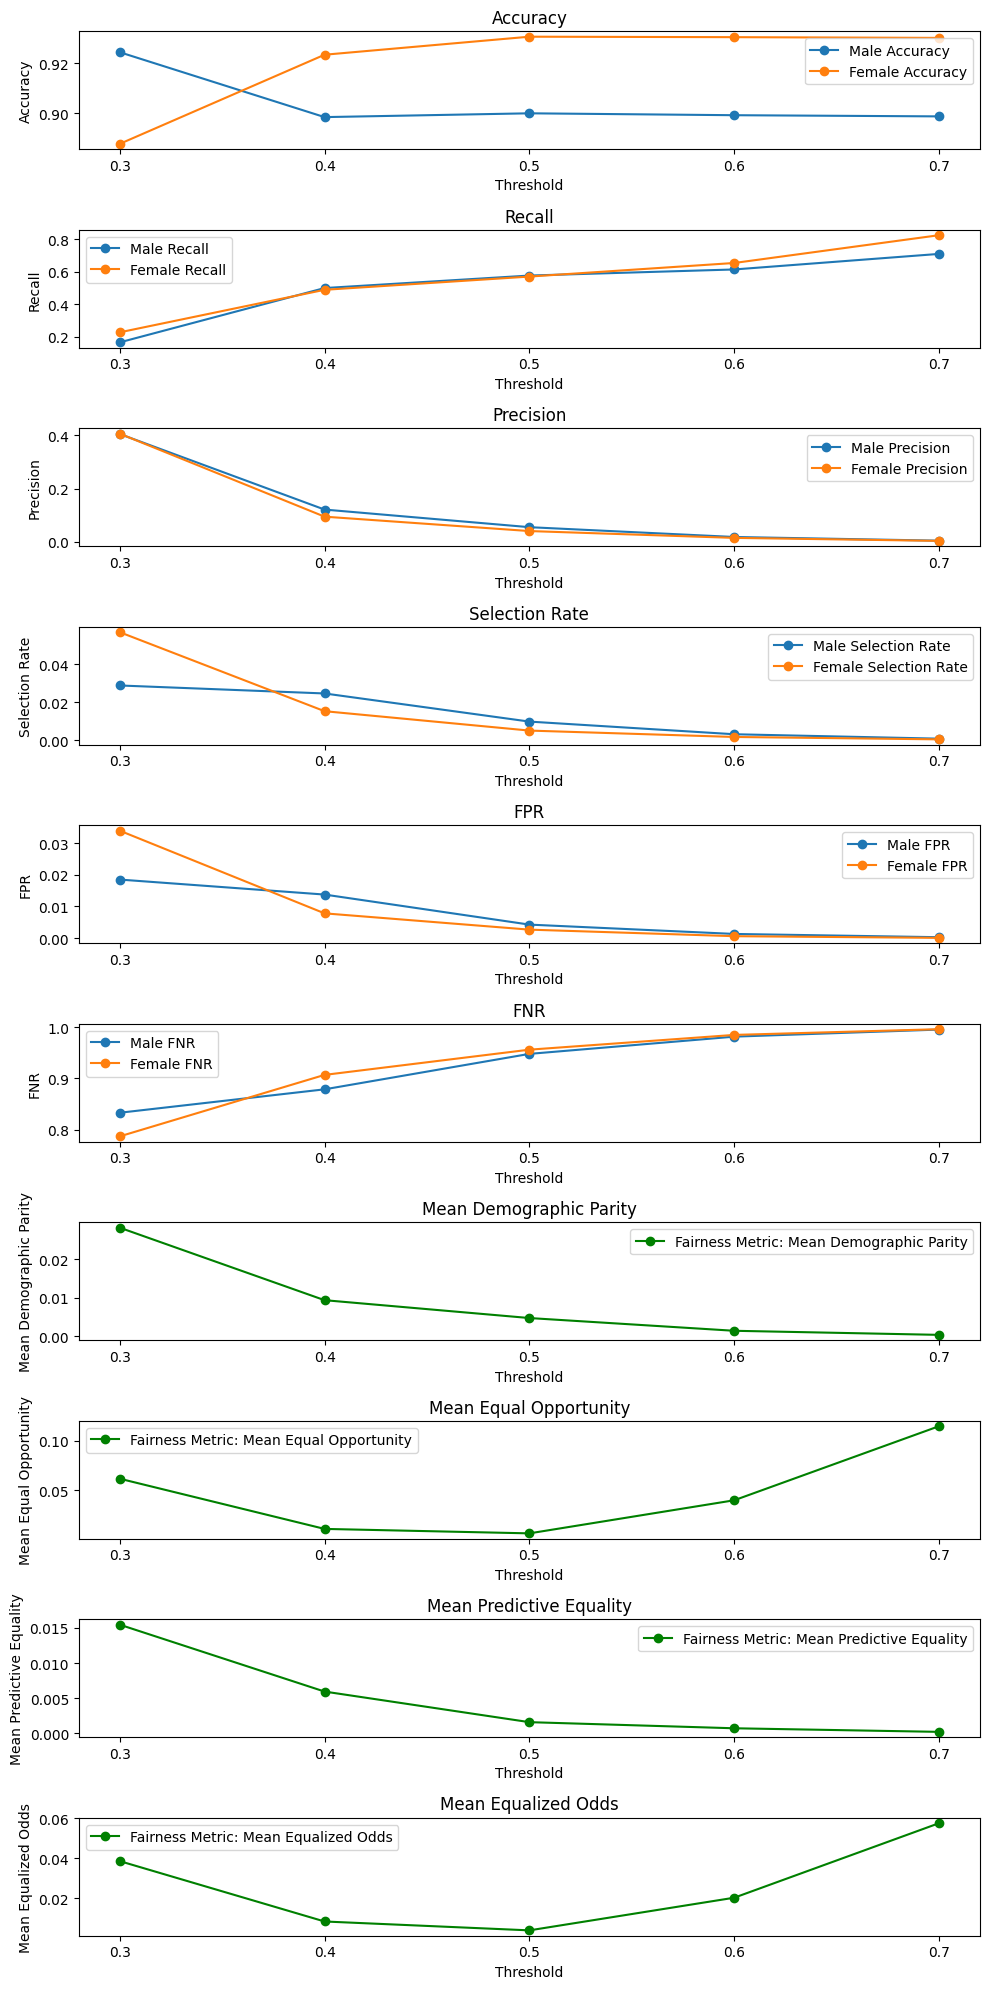

In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
metrics = {
    'Accuracy': {'Male': [0.92448, 0.89851, 0.90003, 0.89927, 0.89880], 'Female': [0.88780, 0.92348, 0.93070, 0.93051, 0.93022]},
    'Recall': {'Male': [0.16688, 0.49967, 0.57624, 0.61353, 0.70889], 'Female': [0.22841, 0.48892, 0.57000, 0.65326, 0.82355]},
    'Precision': {'Male': [0.40456, 0.12120, 0.05520, 0.01843, 0.00460], 'Female': [0.40571, 0.09462, 0.04067, 0.01504, 0.00388]},
    'Selection Rate': {'Male': [0.02888, 0.02465, 0.00975, 0.00305, 0.00071], 'Female': [0.05710, 0.01526, 0.00499, 0.00161, 0.00034]},
    'FPR': {'Male': [0.01850, 0.01376, 0.00426, 0.00131, 0.00028], 'Female': [0.03395, 0.00782, 0.00267, 0.00060, 0.00007]},
    'FNR': {'Male': [0.83312, 0.87880, 0.94795, 0.98157, 0.99540], 'Female': [0.78704, 0.90696, 0.95617, 0.98496, 0.99612]},
    'Mean Demographic Parity': [0.02822, 0.00939, 0.00475, 0.00144, 0.00038],
    'Mean Equal Opportunity': [0.06153, 0.01075, 0.00624, 0.03972, 0.11466],
    'Mean Predictive Equality': [0.01545, 0.00594, 0.00159, 0.00072, 0.00021],
    'Mean Equalized Odds': [0.03849, 0.00835, 0.00392, 0.02022, 0.05743]
}

# Plotting function
def plot_metrics(metrics, thresholds):
    num_rows = len(metrics)  # Count total number of metrics including fairness metrics
    fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 2 * num_rows))  # Adjust the number of rows in subplots
    axes = axes.flatten()  # Flatten in case of one row
    for i, (metric, data) in enumerate(metrics.items()):
        if type(data) is dict:  # Male and Female data
            for gender, values in data.items():
                axes[i].plot(thresholds, values, label=f'{gender} {metric}', marker='o')
        else:  # Single data line for fairness metrics
            axes[i].plot(thresholds, data, label=f'Fairness Metric: {metric}', marker='o', linestyle='-', color='green')
        axes[i].set_title(metric)
        axes[i].set_xlabel('Threshold')
        axes[i].set_ylabel(metric)
        axes[i].set_xticks(np.arange(0.3, 0.8, 0.1))  # Setting x ticks to 0.1 intervals from 0.3 to 0.7
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Call the function with the data
plot_metrics(metrics, thresholds)


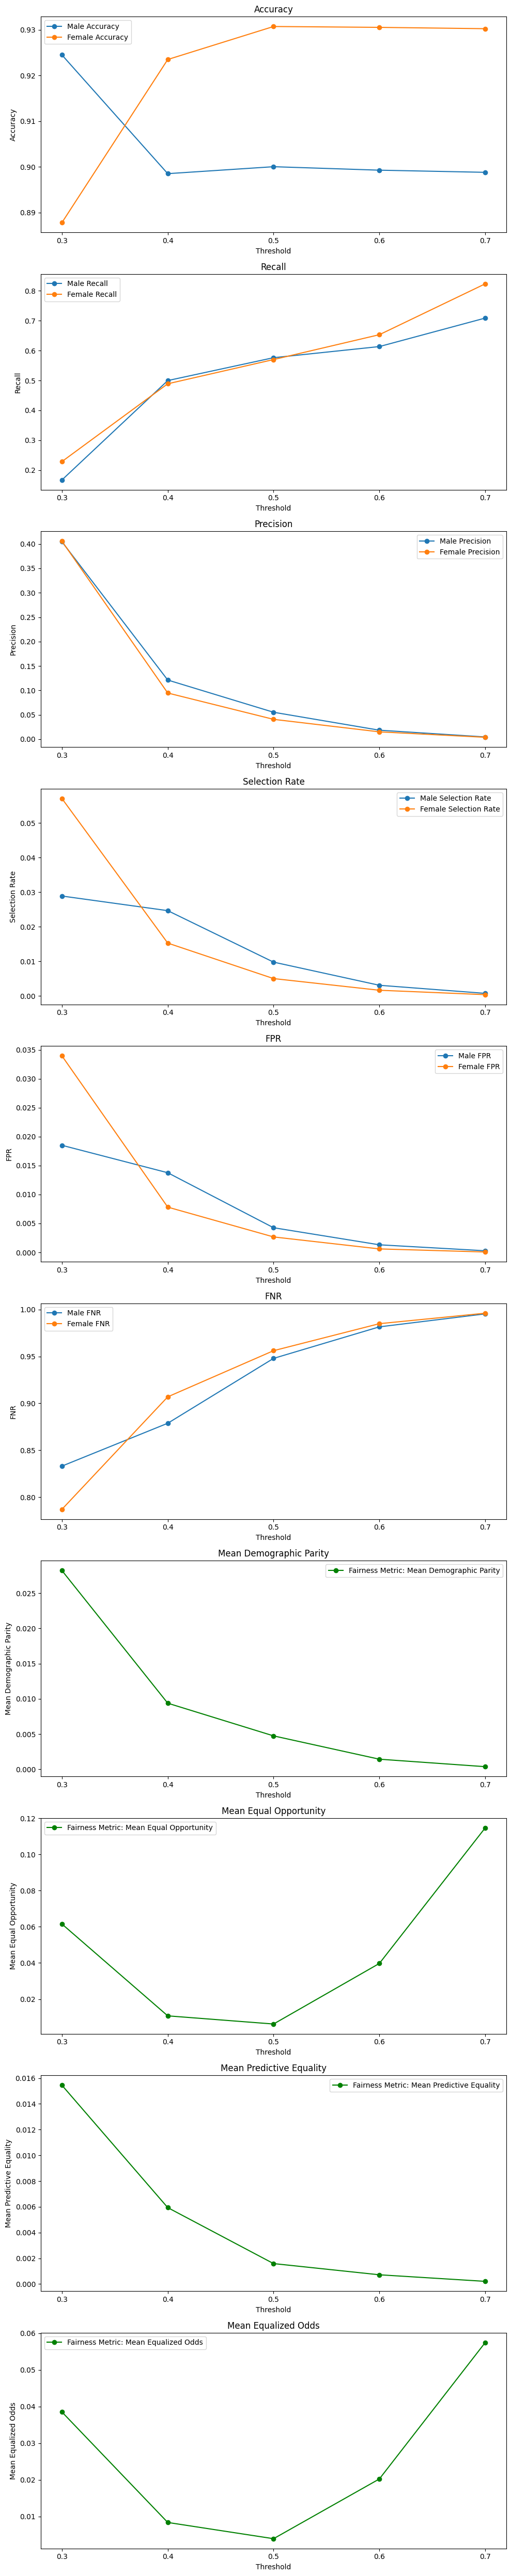

In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
metrics = {
    'Accuracy': {'Male': [0.92448, 0.89851, 0.90003, 0.89927, 0.89880], 'Female': [0.88780, 0.92348, 0.93070, 0.93051, 0.93022]},
    'Recall': {'Male': [0.16688, 0.49967, 0.57624, 0.61353, 0.70889], 'Female': [0.22841, 0.48892, 0.57000, 0.65326, 0.82355]},
    'Precision': {'Male': [0.40456, 0.12120, 0.05520, 0.01843, 0.00460], 'Female': [0.40571, 0.09462, 0.04067, 0.01504, 0.00388]},
    'Selection Rate': {'Male': [0.02888, 0.02465, 0.00975, 0.00305, 0.00071], 'Female': [0.05710, 0.01526, 0.00499, 0.00161, 0.00034]},
    'FPR': {'Male': [0.01850, 0.01376, 0.00426, 0.00131, 0.00028], 'Female': [0.03395, 0.00782, 0.00267, 0.00060, 0.00007]},
    'FNR': {'Male': [0.83312, 0.87880, 0.94795, 0.98157, 0.99540], 'Female': [0.78704, 0.90696, 0.95617, 0.98496, 0.99612]},
    'Mean Demographic Parity': [0.02822, 0.00939, 0.00475, 0.00144, 0.00038],
    'Mean Equal Opportunity': [0.06153, 0.01075, 0.00624, 0.03972, 0.11466],
    'Mean Predictive Equality': [0.01545, 0.00594, 0.00159, 0.00072, 0.00021],
    'Mean Equalized Odds': [0.03849, 0.00835, 0.00392, 0.02022, 0.05743]
}

def plot_metrics(metrics, thresholds):
    num_rows = len(metrics)
    fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 5 * num_rows))
    axes = axes.flatten()
    for i, (metric, data) in enumerate(metrics.items()):
        if type(data) is dict:
            for gender, values in data.items():
                axes[i].plot(thresholds, values, label=f'{gender} {metric}', marker='o')
        else:
            axes[i].plot(thresholds, data, label=f'Fairness Metric: {metric}', marker='o', linestyle='-', color='green')
        axes[i].set_title(metric)
        axes[i].set_xlabel('Threshold')
        axes[i].set_ylabel(metric)
        axes[i].set_xticks(np.arange(0.3, 0.7 + 0.1, 0.1))
        axes[i].legend()

    plt.tight_layout()
    plt.show()

plot_metrics(metrics, thresholds)